In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit

In [2]:
from matplotlib.pyplot import cm
colors=cm.rainbow(np.linspace(0, 1, 10))

In [3]:
@jit(nopython=True)
def sigmoid(x, ymin=0, ymax=1, x50L=-1, x50U=1, e=2):
    """
    Map the x into (ymin, ymax), as S-curve, with 50% of the values
    inside (x50L, x50U)

    Default is normal S-curve

    Reference:
    https://stats.stackexchange.com/questions/265266/adjusting-s-curves-sigmoid-functions-with-hyperparameters
    """
    a = (x50L + x50U) / e
    b = e / (x50L - x50U)
    c = ymin
    d = ymax - c
    y = c + (d / (1.0 + np.exp(b * (x - a))))
    return y

### Parameter: e

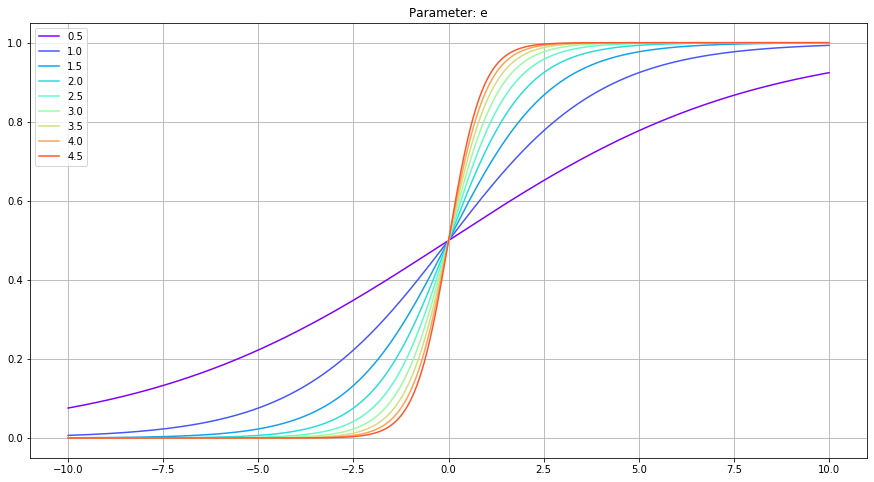

In [15]:
x = np.arange(-10000, 10000)/ 1000
ymin, ymax = 0, 1
x50L, x50U = -1, 1

es = np.arange(0.5, 5, 0.5)
fig, ax = plt.subplots(figsize=(15, 8))
for i, e in enumerate(es):
    ax.plot(x, sigmoid(x, ymin, ymax, x50L, x50U, e), label=str(e), color=colors[i])

_ = ax.legend()
_ = ax.grid(True)
_ = ax.set_title('Parameter: e')

### Parameter: (x50L, x50U)

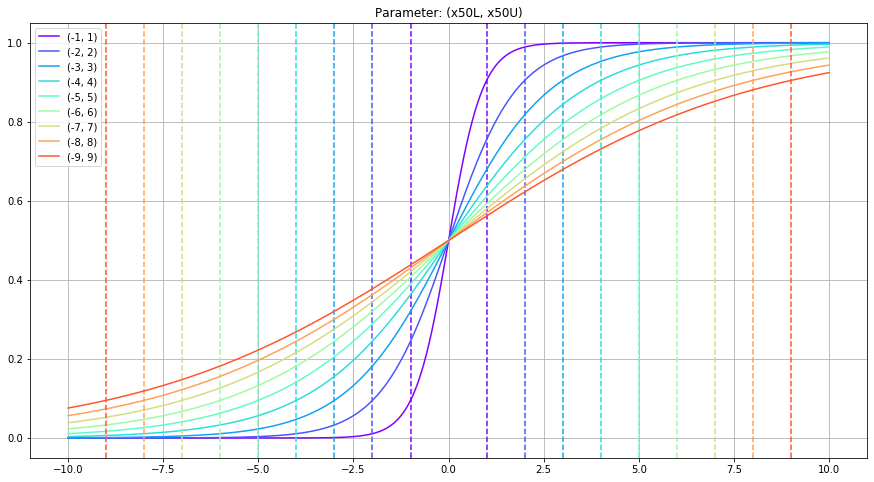

In [14]:
x = np.arange(-10000, 10000)/ 1000
ymin, ymax = 0, 1
es = 2

x50s = list(zip(-np.arange(1, 10), np.arange(1, 10)))
fig, ax = plt.subplots(figsize=(15, 8))
for i, (xl, xu) in enumerate(x50s):
    c = colors[i]
    ax.plot(x, sigmoid(x, ymin, ymax, xl, xu, e), color=c, label=str((xl, xu)))
    ax.axvline(xl, ls='--', color=c)
    ax.axvline(xu, ls='--', color=c)

_ = ax.legend()
_ = ax.grid(True)
_ = ax.set_title('Parameter: (x50L, x50U)')

In [51]:
x1 = np.arange(-10000, 10000)/ 1000
x = np.sort(np.random.randint(-50000, 50000, 10) / 1000)

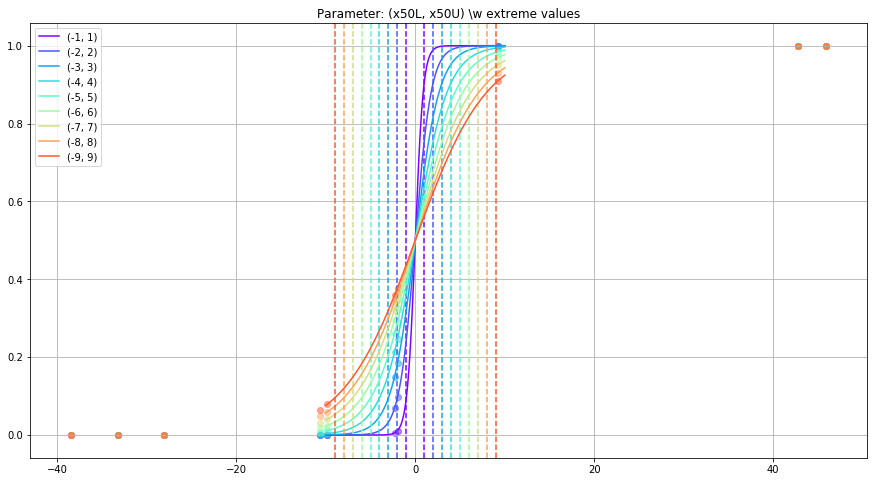

In [53]:
ymin, ymax = 0, 1
es = 2

x50s = list(zip(-np.arange(1, 10), np.arange(1, 10)))
fig, ax = plt.subplots(figsize=(15, 8))
for i, (xl, xu) in enumerate(x50s):
    c = colors[i]
    ax.scatter(x, sigmoid(x, ymin, ymax, xl, xu, e), color=c, alpha=0.5)
    ax.plot(x1, sigmoid(x1, ymin, ymax, xl, xu, e), color=c, label=str((xl, xu)))
    ax.axvline(xl, ls='--', color=c)
    ax.axvline(xu, ls='--', color=c)

_ = ax.legend()
_ = ax.grid(True)
_ = ax.set_title('Parameter: (x50L, x50U) \w extreme values')